# Nike Sales Prediction Using XGBRegressor

## Data Loading

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/nike_sales_2024.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [4]:
df.shape

(1000, 10)

In [5]:
df.size

10000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [7]:
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


In [8]:
df.isnull().sum()

,0
Month,0
Region,0
Main_Category,0
Sub_Category,0
Product_Line,0
Price_Tier,0
Units_Sold,0
Revenue_USD,0
Online_Sales_Percentage,0
Retail_Price,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
Month,12
Region,7
Main_Category,3
Sub_Category,11
Product_Line,24
Price_Tier,3
Units_Sold,995
Revenue_USD,996
Online_Sales_Percentage,41
Retail_Price,26


## Data Visualization

In [11]:
# Making copy of dataset for data visualization

df_dv = df.copy()

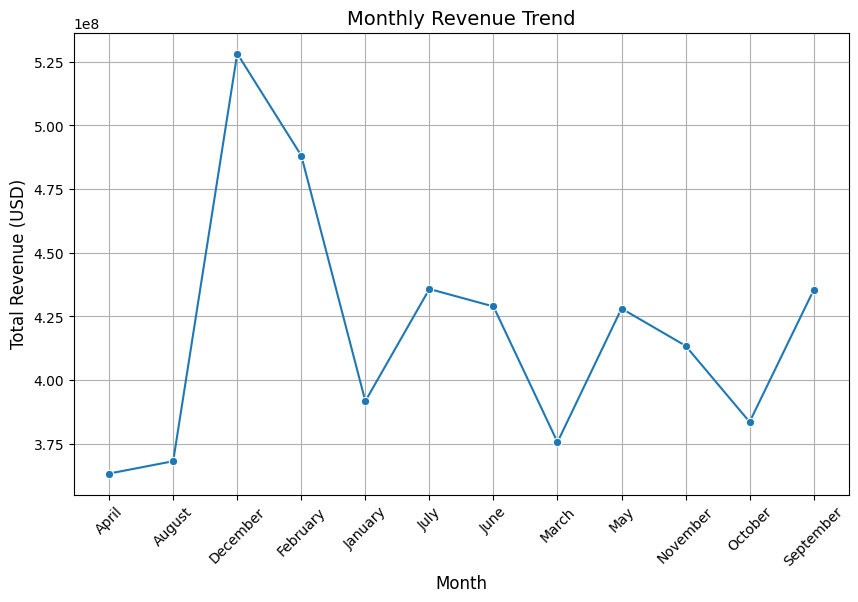

In [12]:
# Monthly Sales Trend

monthly_sales = df_dv.groupby('Month')['Revenue_USD'].sum().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-13-880d44c5da9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='viridis')


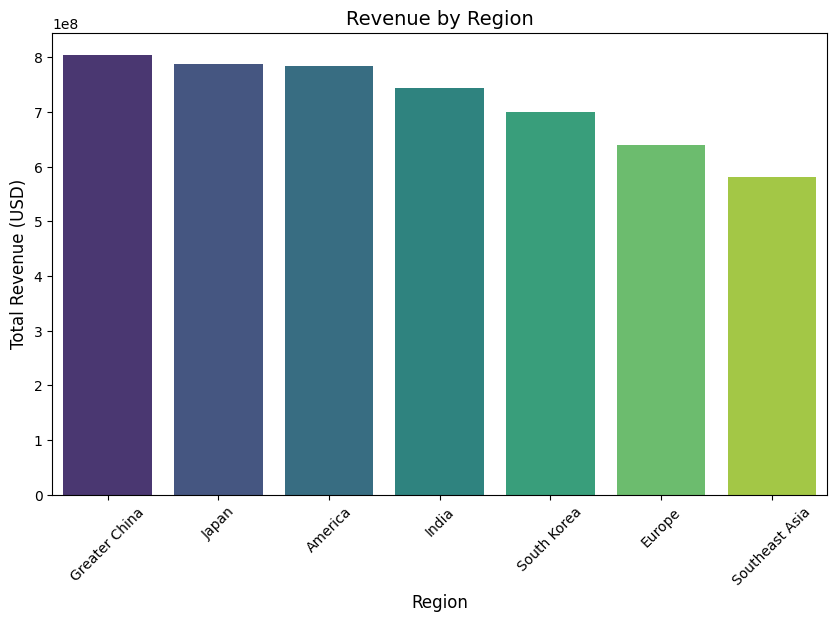

In [13]:
# Regional Performance

regional_sales = df_dv.groupby('Region')['Revenue_USD'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='viridis')
plt.title('Revenue by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-dd5bac17680b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_sales.values, y=product_line_sales.index, palette='coolwarm')


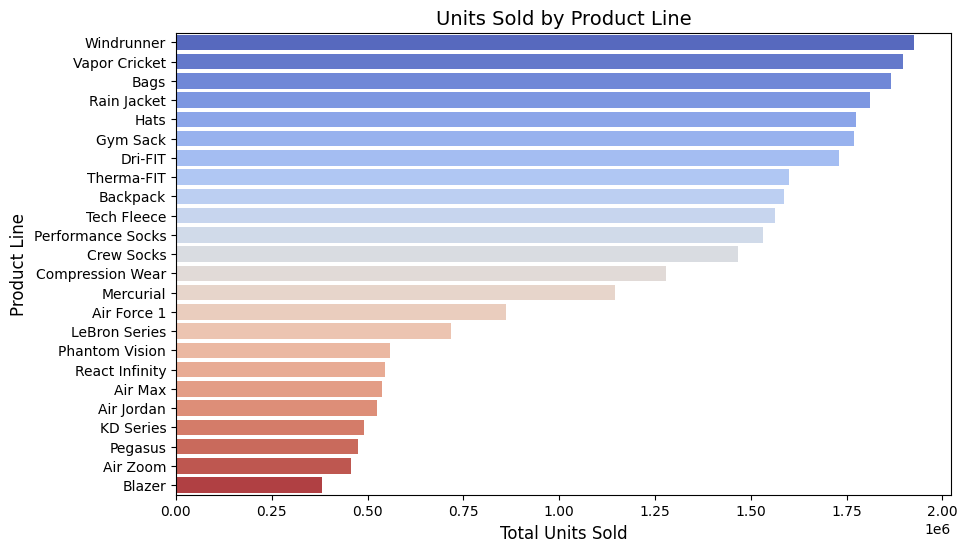

In [14]:
# ProductLine Analysis

product_line_sales = df_dv.groupby('Product_Line')['Units_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_sales.values, y=product_line_sales.index, palette='coolwarm')
plt.title('Units Sold by Product Line', fontsize=14)
plt.xlabel('Total Units Sold', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.show()

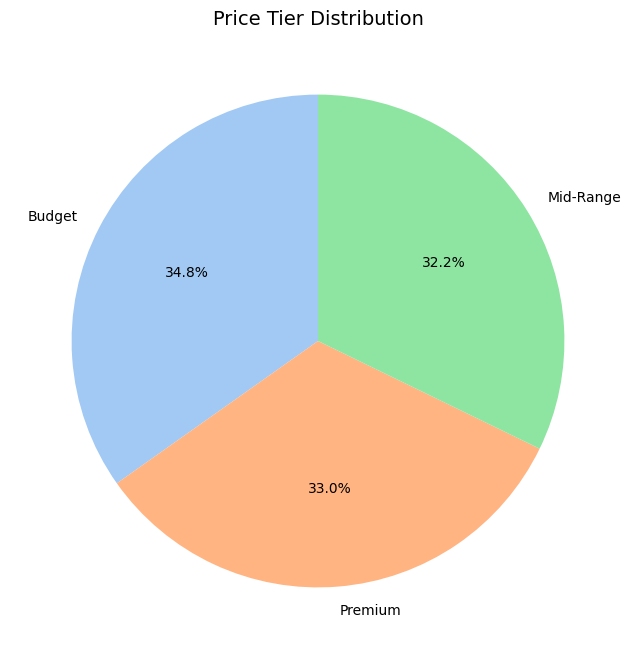

In [15]:
# Price Tier Distribution

price_tier_distribution = df_dv['Price_Tier'].value_counts()

plt.figure(figsize=(8, 8))
price_tier_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Price Tier Distribution', fontsize=14)
plt.ylabel('')
plt.show()

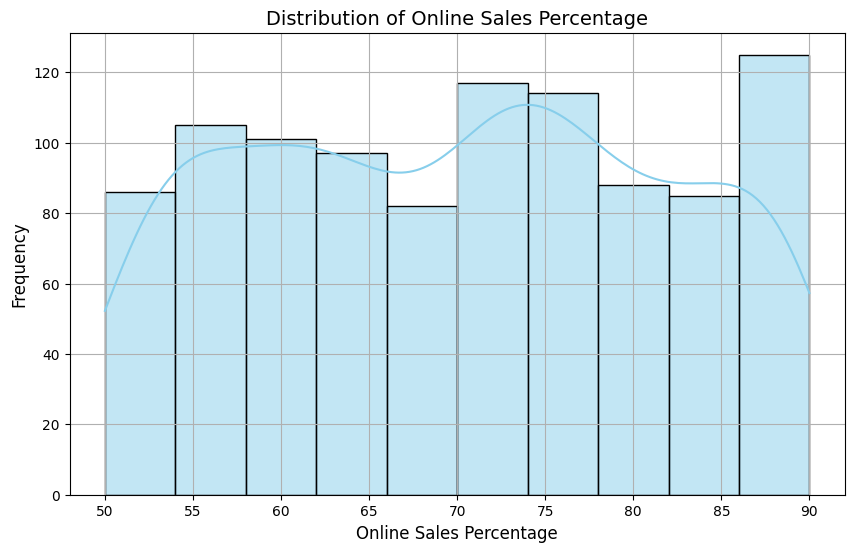

In [16]:
# Online vs. Retail Sales Percentage

plt.figure(figsize=(10, 6))
sns.histplot(df_dv['Online_Sales_Percentage'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Online Sales Percentage', fontsize=14)
plt.xlabel('Online Sales Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-17-080d1dc36ed5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_revenue.values, y=subcategory_revenue.index, palette='magma')


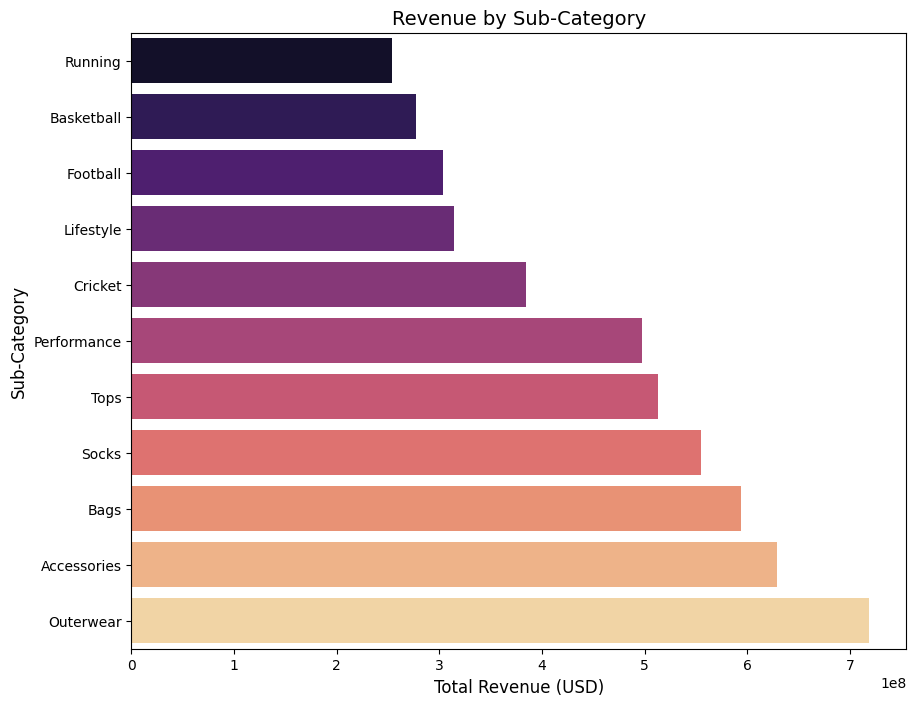

In [17]:
# Sub-Category Revenue Contribution

subcategory_revenue = df_dv.groupby('Sub_Category')['Revenue_USD'].sum().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=subcategory_revenue.values, y=subcategory_revenue.index, palette='magma')
plt.title('Revenue by Sub-Category', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.show()

<ipython-input-18-8ca6e4be6c60>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='Blues_r')


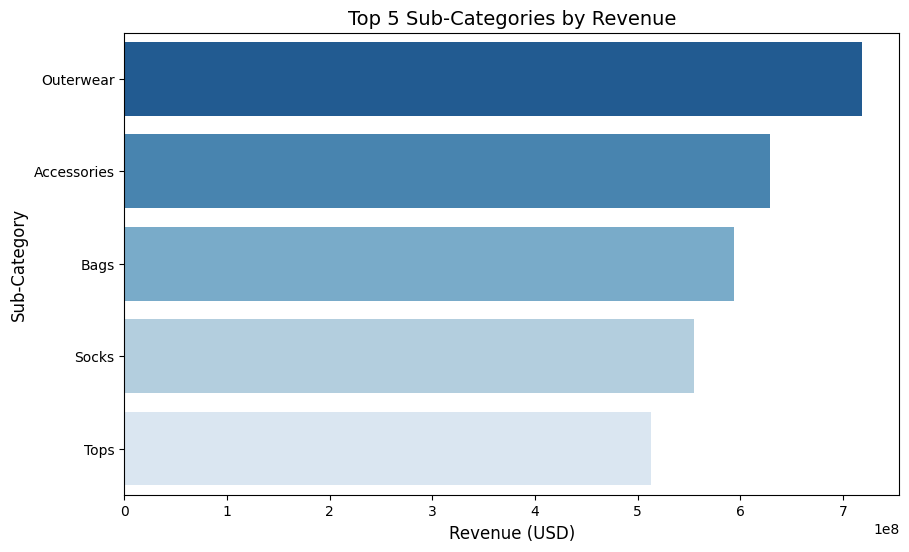

In [18]:
# Top 5 Sub-Categories by Revenue

top_subcategories = df_dv.groupby('Sub_Category')['Revenue_USD'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='Blues_r')
plt.title('Top 5 Sub-Categories by Revenue', fontsize=14)
plt.xlabel('Revenue (USD)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.show()

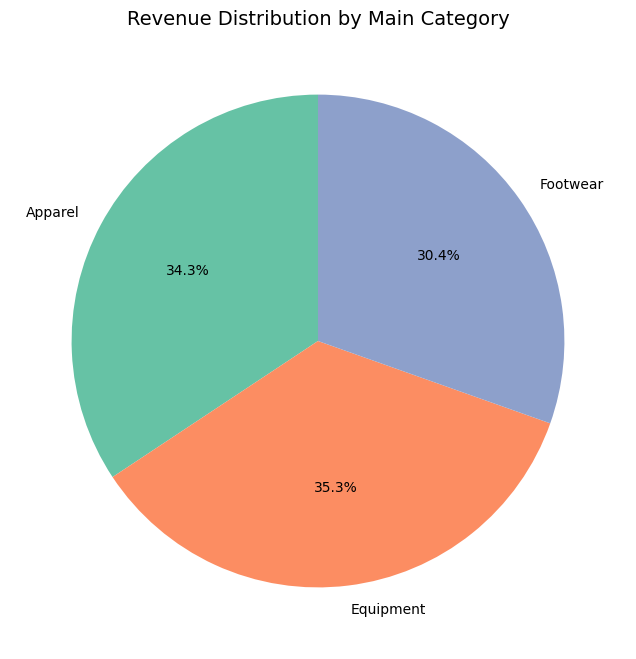

In [19]:
# Revenue by Main Category

main_category_revenue = df_dv.groupby('Main_Category')['Revenue_USD'].sum()

plt.figure(figsize=(8, 8))
main_category_revenue.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Revenue Distribution by Main Category', fontsize=14)
plt.ylabel('')
plt.show()

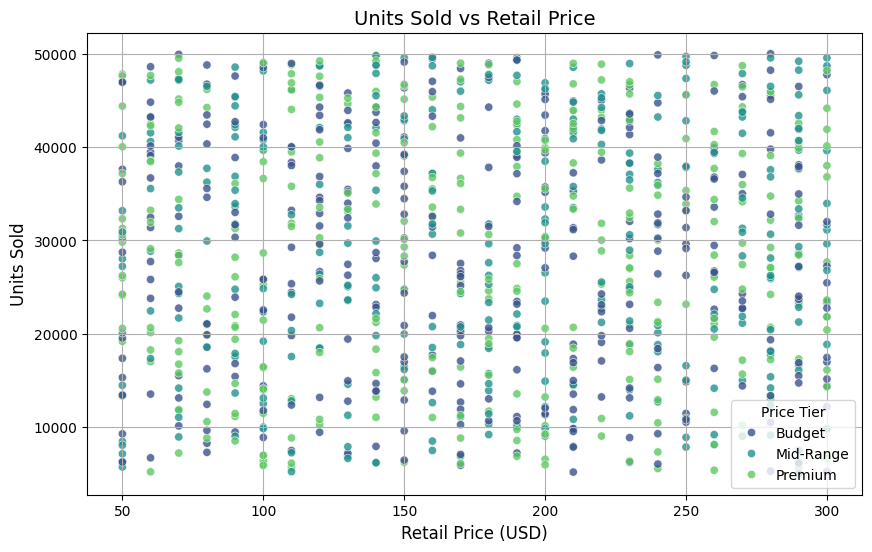

In [20]:
# Units Sold vs Retail Price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retail_Price', y='Units_Sold', data=df_dv, hue='Price_Tier', palette='viridis', alpha=0.8)
plt.title('Units Sold vs Retail Price', fontsize=14)
plt.xlabel('Retail Price (USD)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Price Tier')
plt.grid(True)
plt.show()

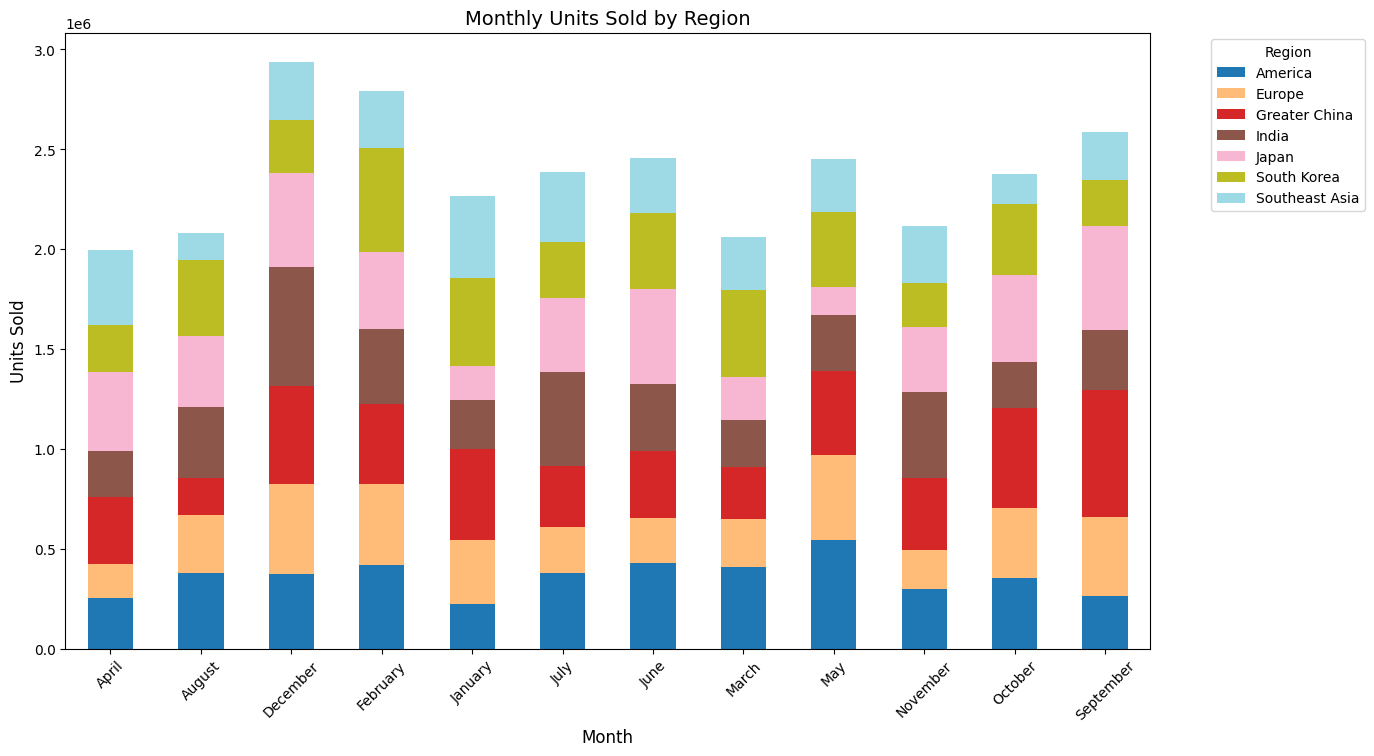

In [22]:
# Monthly Units Sold by Region

monthly_region_sales = df_dv.groupby(['Month', 'Region'])['Units_Sold'].sum().unstack()

monthly_region_sales.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='tab20')
plt.title('Monthly Units Sold by Region', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

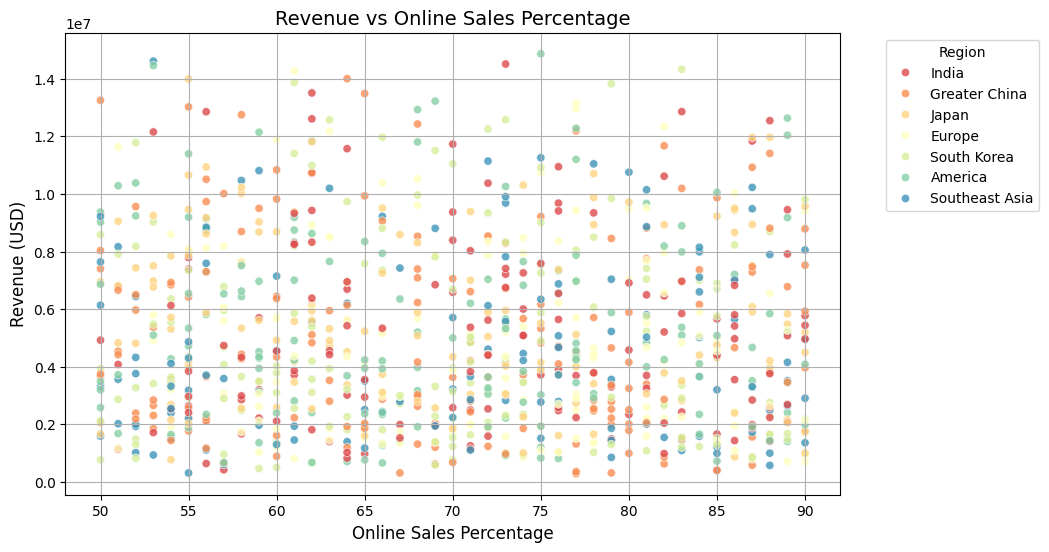

In [23]:
# Revenue vs Online Sales Percentage

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Online_Sales_Percentage', y='Revenue_USD', data=df_dv, hue='Region', palette='Spectral', alpha=0.8)
plt.title('Revenue vs Online Sales Percentage', fontsize=14)
plt.xlabel('Online Sales Percentage', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

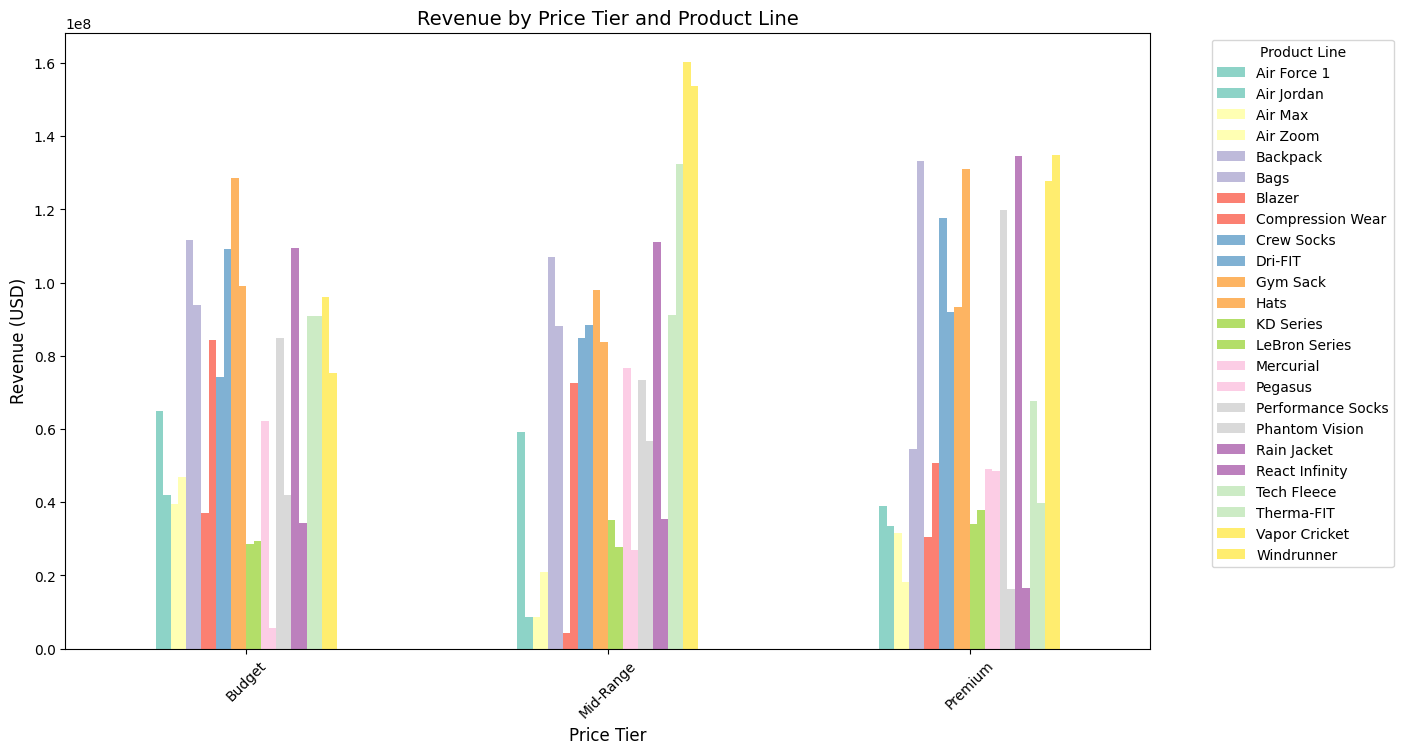

In [24]:
# Revenue by Price Tier and Product Line

price_tier_product_line = df_dv.groupby(['Price_Tier', 'Product_Line'])['Revenue_USD'].sum().unstack()

price_tier_product_line.plot(kind='bar', figsize=(14, 8), colormap='Set3')
plt.title('Revenue by Price Tier and Product Line', fontsize=14)
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [25]:
# Encoding data

encoder = LabelEncoder()

df['Month'] = encoder.fit_transform(df['Month'])
df['Region'] = encoder.fit_transform(df['Region'])
df['Main_Category'] = encoder.fit_transform(df['Main_Category'])
df['Sub_Category'] = encoder.fit_transform(df['Sub_Category'])
df['Product_Line'] = encoder.fit_transform(df['Product_Line'])
df['Price_Tier'] = encoder.fit_transform(df['Price_Tier'])

In [26]:
X = df.drop(['Retail_Price'], axis = 1)
y = df['Retail_Price']

In [27]:
# Train test and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=200)

In [28]:
# Standard Scaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [29]:
model = XGBRegressor()

In [30]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Prediction

In [31]:
y_pred = model.predict(X_test)

In [35]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  5.968606567382812


In [36]:
squared_error = metrics.r2_score(y_test,y_pred)
print("R2 score is: ",squared_error)

R2 score is:  0.9868592402764974
